In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
sns.set()

In [2]:
# Load the dataset
df = pd.read_csv('../data/join_02.csv')

In [3]:
# date format preparation
df['date'] = pd.to_datetime(df['date'])
df['release_date'] = pd.to_datetime(df['release_date'])

In [4]:
df.columns

Index(['gamename', 'year', 'month', 'avg', 'gain', 'peak', 'avg_peak_perc',
       'date', 'release_date', 'required_age', 'price', 'dlc_count', 'windows',
       'mac', 'linux', 'metacritic_score', 'positive', 'negative',
       'developers', 'publishers', 'average_playtime_forever',
       'average_playtime_two_weeks', 'median_playtime_forever',
       'median_playtime_two_weeks', 'multi_player', 'pvp', 'co-op',
       'genre_action', 'genre_adventure', 'genre_casual',
       'genre_sexual_content', 'genre_strategy', 'genre_sports',
       'genre_racing', 'genre_rpg', 'genre_simulation', 'indie', 'full_audio',
       'full_controller_support', 'age_0_plus', 'age_13_plus', 'age_18_plus'],
      dtype='object')

In [6]:
ax = 'age_0_plus'
y = 'avg'
df_ax = df[df[ax]==1]
df_ax = df_ax[['gamename', 'date', y, ax]].sort_values(by=y, ascending=order).reset_index()    # Data - Plot 1
max = df_ax.gamename.unique().len()
max

NameError: name 'y' is not defined

In [216]:
genres = df.sort_values(by='avg').publishers.unique()[0:5].tolist()
genres

['Devolver Digital',
 'SNK CORPORATION',
 'Fullbright',
 'PlayWay S.A.',
 'Galactic Cafe']

In [217]:
for publisher in genres:
    # gb[publisher.strip('.').replace(' ', '_')] = (df['publishers']==publisher)*1
    df[publisher] = (df['publishers']==publisher)*1
genres

['Devolver Digital',
 'SNK CORPORATION',
 'Fullbright',
 'PlayWay S.A.',
 'Galactic Cafe']

In [196]:
y = 'avg'
['gamename', 'date', y]+genres

ValueError: operands could not be broadcast together with shapes (3,) (5,) 

In [ ]:
df_bx = df[['gamename', 'date', y]+genres].sort_values(by=y, ascending=order).reset_index() 

In [173]:
ax = 'pvp'
y = 'avg_peak_perc'
genres = ['multi_player', 'pvp', 'co-op']
gb_ax = df[df[ax]==1]
gb_ax = gb_ax[['gamename', 'date', y, ax]].sort_values(by=y, ascending=True).reset_index()
gb_ax = gb_ax.gamename.unique()[0:5]
df_bx = df[['gamename', 'date', y]+genres].sort_values(by=y, ascending=True).reset_index()      # Data - Plot 2

In [174]:
gb = df_bx.sort_values(by='date')      # New copy of df
mean_list = {category: gb[gb[category] == 1].groupby('date').mean(y).reset_index() for category in selected_options}

mean_list['pvp']

date         index  multi_player  pvp     co-op
0   2012-07-01  38419.272727           1.0  1.0  0.681818
1   2012-08-01  39756.833333           1.0  1.0  0.666667
2   2012-09-01  38476.111111           1.0  1.0  0.629630
3   2012-10-01  38960.642857           1.0  1.0  0.607143
4   2012-11-01  37933.451613           1.0  1.0  0.548387
..         ...           ...           ...  ...       ...
99  2020-10-01  31665.257042           1.0  1.0  0.556338
100 2020-11-01  31656.761404           1.0  1.0  0.557895
101 2020-12-01  31943.610526           1.0  1.0  0.557895
102 2021-01-01  31865.765734           1.0  1.0  0.559441
103 2021-02-01  31765.275261           1.0  1.0  0.557491

[104 rows x 5 columns]

In [176]:
gb.avg_peak_perc.dtypes

dtype('O')

In [ ]:
fig_mean = go.Figure()
for category, gb in mean_list.items():
    fig_mean = fig_mean.add_trace(go.Scatter(x=gb['date'], y=gb[y], name=category, mode='lines'))
fig_mean.update_layout(
    xaxis_title = 'Date',
    yaxis_title = 'Mean of '+y_name,
)

In [157]:
gb2 = df.sort_values(by='avg', ascending=False).reset_index()
gb2.head()

index                          gamename  year     month        avg  \
0  10427  Counter-Strike: Global Offensive  2020     April  857604.22   
1  10426  Counter-Strike: Global Offensive  2020       May  768795.25   
2  10418  Counter-Strike: Global Offensive  2021   January  743209.66   
3  10417  Counter-Strike: Global Offensive  2021  February  741013.24   
4  10419  Counter-Strike: Global Offensive  2020  December  717803.75   

        gain     peak avg_peak_perc       date release_date  ...  \
0  186570.94  1305714      65.6809% 2020-04-01   2012-08-21  ...   
1  -88808.97  1193359      64.4228% 2020-05-01   2012-08-21  ...   
2   25405.91  1124553      66.0893% 2021-01-01   2012-08-21  ...   
3   -2196.42  1123485      65.9567% 2021-02-01   2012-08-21  ...   
4   49049.17  1164396       61.646% 2020-12-01   2012-08-21  ...   

   genre_sports  genre_racing  genre_rpg  genre_simulation  indie  full_audio  \
0             0             0          0                 0      0           1   
1             0             0          0                 0      0           1   
2             0             0          0                 0      0           1   
3             0             0          0                 0      0           1   
4             0             0          0                 0      0           1   

   full_controller_support  age_0_plus  age_13_plus age_18_plus  
0                        1           1            0           0  
1                        1           1            0           0  
2                        1           1            0           0  
3                        1           1            0           0  
4                        1           1            0           0  

[5 rows x 43 columns]

In [158]:
selected_options = ['multi_player', 'pvp', 'co-op']
mean_list = {category: gb2[gb2[category] == 1].groupby('date').mean('avg').reset_index() for category in selected_options}
mean_list['pvp']

date         index    year          avg        gain         peak  \
0   2012-07-01  38419.272727  2012.0  3948.582273         NaN  6573.863636   
1   2012-08-01  39756.833333  2012.0  3043.825833 -638.028182  5068.166667   
2   2012-09-01  38476.111111  2012.0  2270.342963 -509.308333  4443.407407   
3   2012-10-01  38960.642857  2012.0  2266.883571   80.501852  6134.714286   
4   2012-11-01  37933.451613  2012.0  2875.010968  329.993929  5925.258065   
..         ...           ...     ...          ...         ...          ...   
99  2020-10-01  31665.257042  2020.0  3010.679930  -95.880356  5947.271127   
100 2020-11-01  31656.761404  2020.0  3252.520281  250.749155  6525.863158   
101 2020-12-01  31943.610526  2020.0  3386.813719   86.572367  6717.368421   
102 2021-01-01  31865.765734  2021.0  3927.748217  551.905860  7334.255245   
103 2021-02-01  31765.275261  2021.0  3758.608223 -155.456620  8125.515679   

     required_age      price  dlc_count  windows  ...  genre_sports  \
0        2.318182  11.855455   1.818182      1.0  ...      0.000000   
1        2.125000  11.492083   1.791667      1.0  ...      0.000000   
2        2.518519  12.621481   2.370370      1.0  ...      0.000000   
3        2.428571  12.884643   2.285714      1.0  ...      0.000000   
4        2.193548  11.798710   2.387097      1.0  ...      0.000000   
..            ...        ...        ...      ...  ...           ...   
99       1.679577  15.852641   6.394366      1.0  ...      0.073944   
100      1.673684  15.867158   6.371930      1.0  ...      0.073684   
101      1.733333  15.902211   6.371930      1.0  ...      0.073684   
102      1.727273  15.846608   6.367133      1.0  ...      0.073427   
103      1.721254  15.791394   6.344948      1.0  ...      0.073171   

     genre_racing  genre_rpg  genre_simulation     indie  full_audio  \
0        0.000000   0.318182          0.090909  0.409091    0.818182   
1        0.000000   0.333333          0.083333  0.375000    0.833333   
2        0.000000   0.296296          0.074074  0.407407    0.814815   
3        0.000000   0.285714          0.071429  0.392857    0.821429   
4        0.000000   0.258065          0.064516  0.419355    0.806452   
..            ...        ...               ...       ...         ...   
99       0.052817   0.257042          0.278169  0.507042    0.658451   
100      0.052632   0.256140          0.280702  0.508772    0.656140   
101      0.052632   0.256140          0.280702  0.508772    0.656140   
102      0.052448   0.258741          0.279720  0.506993    0.657343   
103      0.052265   0.257840          0.278746  0.505226    0.658537   

     full_controller_support  age_0_plus  age_13_plus  age_18_plus  
0                   0.181818    0.863636     0.136364     0.000000  
1                   0.166667    0.875000     0.125000     0.000000  
2                   0.148148    0.851852     0.148148     0.000000  
3                   0.178571    0.857143     0.142857     0.000000  
4                   0.161290    0.870968     0.129032     0.000000  
..                       ...         ...          ...          ...  
99                  0.306338    0.897887     0.098592     0.003521  
100                 0.305263    0.898246     0.098246     0.003509  
101                 0.305263    0.894737     0.101754     0.003509  
102                 0.304196    0.895105     0.101399     0.003497  
103                 0.303136    0.895470     0.101045     0.003484  

[104 rows x 37 columns]

In [159]:
fig = go.Figure()
for cateogory, gb2 in mean_list.items():
    fig = fig.add_trace(go.Scatter(x=gb2['date'], y=gb2['avg'], name=cateogory, mode='lines'))
fig.show()

In [113]:
gb = df
gb2 = gb.sort_values(by='date')
selected_options = ['multi_player', 'pvp', 'co-op']
gb_list = {category: gb2[gb2[category] == 1] for category in selected_options}
gb_list['pvp'].head()

gamename  year month       avg  gain   peak  \
2862   Arma 2: Operation Arrowhead  2012  July   3625.94   NaN   6739   
10130               Counter-Strike  2012  July  34139.20   NaN  53967   
16832     E.Y.E: Divine Cybermancy  2012  July    230.31   NaN    758   
36666               ORION: Prelude  2012  July     20.72   NaN     88   
1666                AirMech Strike  2012  July     10.21   NaN     29   

      avg_peak_perc       date release_date  required_age  ...  genre_sports  \
2862       53.8053% 2012-07-01   2010-06-29            17  ...             0   
10130      63.2594% 2012-07-01   2000-11-01             0  ...             0   
16832      30.3839% 2012-07-01   2011-07-29             0  ...             0   
36666      23.5455% 2012-07-01   2013-04-16             0  ...             0   
1666       35.2069% 2012-07-01   2018-03-30             0  ...             0   

       genre_racing  genre_rpg  genre_simulation  indie  full_audio  \
2862              0          0                 1      0           1   
10130             0          0                 0      0           1   
16832             0          1                 0      1           0   
36666             0          1                 0      1           1   
1666              0          0                 0      1           1   

       full_controller_support  age_0_plus age_13_plus age_18_plus  
2862                         0           0           1           0  
10130                        0           1           0           0  
16832                        0           1           0           0  
36666                        1           1           0           0  
1666                         0           1           0           0  

[5 rows x 42 columns]

In [110]:
gb2[gb2['pvp'] == 1]

gamename  year     month       avg  \
2862                Arma 2: Operation Arrowhead  2012      July   3625.94   
10130                            Counter-Strike  2012      July  34139.20   
16832                  E.Y.E: Divine Cybermancy  2012      July    230.31   
36666                            ORION: Prelude  2012      July     20.72   
1666                             AirMech Strike  2012      July     10.21   
...                                         ...   ...       ...       ...   
9665                          Conqueror's Blade  2021  February   3816.37   
35151  NARUTO SHIPPUDEN: Ultimate Ninja STORM 4  2021  February   1497.51   
3723                                 BATTLETECH  2021  February   1927.71   
35291                                  NBA 2K21  2021  February  13009.57   
0                             100% Orange Juice  2021  February    278.67   

          gain   peak avg_peak_perc       date release_date  required_age  \
2862       NaN   6739      53.8053% 2012-07-01   2010-06-29            17   
10130      NaN  53967      63.2594% 2012-07-01   2000-11-01             0   
16832      NaN    758      30.3839% 2012-07-01   2011-07-29             0   
36666      NaN     88      23.5455% 2012-07-01   2013-04-16             0   
1666       NaN     29      35.2069% 2012-07-01   2018-03-30             0   
...        ...    ...           ...        ...          ...           ...   
9665   -132.30  10592      36.0307% 2021-02-01   2019-05-30             0   
35151    70.64   3641      41.1291% 2021-02-01   2016-02-04             0   
3723   -261.79   3141      61.3725% 2021-02-01   2018-04-24             0   
35291  2567.95  22954      56.6767% 2021-02-01   2020-09-03             0   
0       -25.23    645      43.2047% 2021-02-01   2014-05-16             0   

       ...  genre_sports  genre_racing  genre_rpg  genre_simulation  indie  \
2862   ...             0             0          0                 1      0   
10130  ...             0             0          0                 0      0   
16832  ...             0             0          1                 0      1   
36666  ...             0             0          1                 0      1   
1666   ...             0             0          0                 0      1   
...    ...           ...           ...        ...               ...    ...   
9665   ...             0             0          0                 0      0   
35151  ...             0             0          0                 0      0   
3723   ...             0             0          0                 0      0   
35291  ...             1             0          0                 1      0   
0      ...             0             0          0                 0      1   

       full_audio  full_controller_support  age_0_plus age_13_plus age_18_plus  
2862            1                        0           0           1           0  
10130           1                        0           1           0           0  
16832           0                        0           1           0           0  
36666           1                        1           1           0           0  
1666            1                        0           1           0           0  
...           ...                      ...         ...         ...         ...  
9665            1                        0           1           0           0  
35151           1                        1           1           0           0  
3723            1                        0           1           0           0  
35291           1                        1           1           0           0  
0               1                        0           1           0           0  

[16420 rows x 42 columns]

In [104]:
gb = gb[gb['avg_peak_perc']!='NaN%']

index                 gamename       date avg_peak_perc
144      114      12 is Better Than 6 2018-08-01       9.9888%
145    60803    War for the Overworld 2013-08-01       9.9839%
146    55596              The Witness 2016-01-01        9.982%
147    63501                   Zup! 2 2018-07-01       9.9706%
148    62018   Woodle Tree Adventures 2017-05-01       9.9699%
...      ...                      ...        ...           ...
63849  36776  Octodad: Dadliest Catch 2012-12-01            0%
63850   6368             Blood Bowl 2 2013-05-01            0%
63851  54947      The Stanley Parable 2013-03-01            0%
63852  54948      The Stanley Parable 2013-02-01            0%
63853  36999                  OneShot 2016-04-01            0%

[63710 rows x 4 columns]

In [105]:
str = "avg_peak_perc"
str.replace('_', ' ')

'avg peak perc'

In [94]:
gb

index                 gamename       date avg_peak_perc
0      18005    Europa Universalis IV 2013-05-01          NaN%
1      50427         Streets of Rogue 2016-12-01          NaN%
2      38544                Pavlov VR 2016-12-01          NaN%
3       7482               Broken Age 2013-09-01          NaN%
4       1512       Age of Wonders III 2013-10-01          NaN%
...      ...                      ...        ...           ...
63849  36776  Octodad: Dadliest Catch 2012-12-01            0%
63850   6368             Blood Bowl 2 2013-05-01            0%
63851  54947      The Stanley Parable 2013-03-01            0%
63852  54948      The Stanley Parable 2013-02-01            0%
63853  36999                  OneShot 2016-04-01            0%

[63854 rows x 4 columns]

In [83]:
gb = df[['gamename', 'date', 'avg']].sort_values(by='avg', ascending=False).reset_index()

In [84]:
top_avg_games = gb.gamename.unique()[0:5]
top_avg_games

array(['Counter-Strike: Global Offensive', 'Dota 2', 'Cyberpunk 2077',
       'Fallout 4', 'Grand Theft Auto V'], dtype=object)

In [85]:
gb = gb.sort_values(by='date')
gb_list = {game: gb[gb["gamename"] == game] for game in top_avg_games}
gb

index                                  gamename       date      avg
28067  34550                             Mount & Blade 2012-07-01   248.73
36605  18594                F.E.A.R. 2: Project Origin 2012-07-01   121.24
10396  32900                               Max Payne 3 2012-07-01  1446.18
25757  49599  Star Wars: Battlefront 2 (Classic, 2005) 2012-07-01   303.06
36810  18490                                  F.E.A.R. 2012-07-01   119.23
...      ...                                       ...        ...      ...
48031  44107                           Road Redemption 2021-02-01    44.25
7272   57018                         Total War: ATTILA 2021-02-01  2453.03
10170  48006                             Slime Rancher 2021-02-01  1497.59
22465  29531                           Kingdoms Reborn 2021-02-01   404.05
14120  28251                                 Ironsight 2021-02-01   905.29

[63854 rows x 4 columns]

In [86]:
fig = go.Figure()
for game, gb in gb_list.items():
    fig = fig.add_trace(go.Scatter(x=gb["date"], y=gb["avg"], name=game, mode='lines'))
fig.show()

In [82]:
gb = df[['gamename', 'date', 'gain']].sort_values(by='gain', ascending=True).reset_index()
top_gained_games = gb.head().gamename.to_list()
top_gained_games

['Cyberpunk 2077',
 'Fallout 4',
 'Monster Hunter: World',
 'Grand Theft Auto V',
 'Dota 2']

In [32]:
gb.head()

index               gamename       date       gain
0  11535         Cyberpunk 2077 2021-01-01 -250248.99
1  19830              Fallout 4 2015-12-01 -132161.46
2  33997  Monster Hunter: World 2018-09-01  -99716.06
3  23425     Grand Theft Auto V 2015-05-01  -99352.39
4  15670                 Dota 2 2015-09-01  -98787.12

In [33]:
gb = gb.sort_values(by='date')
gb_list = {game: gb[gb["gamename"] == game] for game in top_gained_games}

fig = go.Figure()
for game, gb in gb_list.items():
    fig = fig.add_trace(go.Scatter(x=gb["date"], y=gb["gain"], name=game, mode='lines'))
fig.show()

In [5]:
df.sort_values('positive').reset_index().positive.unique()
df.sort_values('positive').reset_index().gamename.unique()

array(['F.E.A.R.', 'RIFT', 'Men of War: Assault Squad 2', 'Artifact',
       'Layers of Fear', 'Idle Monster TD', 'Football Manager 2021 Touch',
       'Granado Espada', 'CosmicBreak Universal',
       'Pro Cycling Manager 2020', 'March of Empires', 'YoloMouse',
       'Idle Wizard', 'Game of Thrones Winter is Coming',
       'Idling to Rule the Gods', 'Stream Avatars', 'Soccer Manager 2021',
       'Out of the Park Baseball 21', 'Farm Manager 2018',
       'OVR Advanced Settings', 'Onmyoji', 'Fisher Online',
       'Crusaders of the Lost Idols', 'Curious Expedition 2',
       'Borderless Gaming', 'Lords Mobile', 'Blade Symphony', 'Caster',
       'EVGA Precision X1', 'GRAV', 'Terraforming Mars',
       'Firestone Idle RPG', 'Bloons Monkey City',
       'Robot Roller-Derby Disco Dodgeball', 'Floating Point',
       'Worm.is: The Game', 'Savage Lands', 'BRINK', 'One Way Heroics',
       "Tiny and Big: Grandpa's Leftovers", 'ArcheAge',
       'Woodle Tree Adventures', "There's Poop In My

In [6]:
gb = df.groupby(['date', 'multi_player']).mean('avg')
gb = gb.reset_index()

In [7]:
gb = df[(df['gamename']=='Fallout 4') | (df['gamename']=='Grand Theft Auto V') | (df['gamename']=='Monster Hunter: World')]
gb = gb[['gamename', 'date','avg']]
gb = gb.reset_index()

In [8]:
gb = df.groupby('gamename').mean('avg')
gb = gb.reset_index()[['gamename', 'avg']].sort_values(by=['avg'], ascending=False)
gb.gamename.to_list()

['Dota 2',
 'Counter-Strike: Global Offensive',
 'Cyberpunk 2077',
 'Destiny 2',
 'Grand Theft Auto V',
 'Team Fortress 2',
 'Football Manager 2021',
 'Football Manager 2020',
 'Monster Hunter: World',
 'ARK: Survival Evolved',
 'Rust',
 'Warframe',
 'Dyson Sphere Program',
 'Phasmophobia',
 "Garry's Mod",
 'Fallout 4',
 'Mount & Blade II: Bannerlord',
 'Dead by Daylight',
 'Crusader Kings III',
 'Terraria',
 'The Elder Scrolls V: Skyrim',
 'Path of Exile',
 'Unturned',
 'PAYDAY 2',
 'Dota Underlords',
 'Total War: WARHAMMER II',
 'Sea of Thieves',
 'Counter-Strike',
 'Arma 3',
 'Age of Empires II: Definitive Edition',
 'Total War: THREE KINGDOMS',
 'Wallpaper Engine',
 'Stardew Valley',
 'Z1 Battle Royale',
 'Hearts of Iron IV',
 'Borderlands 3',
 'Farming Simulator 19',
 'The Elder Scrolls V: Skyrim Special Edition',
 'War Thunder',
 'Euro Truck Simulator 2',
 'Left 4 Dead 2',
 'Stellaris',
 'Satisfactory',
 'RimWorld',
 'Clicker Heroes',
 'Red Dead Online',
 'World of Tanks Blitz',


In [232]:
df.sort_values(by=['gain']).gain

11535   -250248.99
19830   -132161.46
33997    -99716.06
23425    -99352.39
15670    -98787.12
           ...    
63570          NaN
63652          NaN
63708          NaN
63772          NaN
63853          NaN
Name: gain, Length: 63854, dtype: float64

In [231]:
df.sort_values(by=['gain'])

gamename  year      month        avg       gain    peak  \
11535         Cyberpunk 2077  2021    January   82146.66 -250248.99  225670   
19830              Fallout 4  2015   December   94136.37 -132161.46  201635   
33997  Monster Hunter: World  2018  September   88575.17  -99716.06  227644   
23425     Grand Theft Auto V  2015        May   93361.62  -99352.39  215966   
15670                 Dota 2  2015  September  508156.85  -98787.12  888728   
...                      ...   ...        ...        ...        ...     ...   
63570                 Zup! 3  2017    January      91.49        NaN     687   
63652              ibb & obb  2014        May      16.25        NaN     186   
63708                 klocki  2016       July      38.36        NaN     121   
63772              rFactor 2  2015   November     112.81        NaN     313   
63853      theHunter Classic  2014       June    1162.48        NaN    2648   

      avg_peak_perc       date release_date  required_age  ...  genre_sports  \
11535      36.4012% 2021-01-01   2020-12-09            17  ...             0   
19830      46.6865% 2015-12-01   2015-11-09            17  ...             0   
33997      38.9095% 2018-09-01   2018-08-09             0  ...             0   
23425      43.2298% 2015-05-01   2015-04-13            17  ...             0   
15670       57.178% 2015-09-01   2013-07-09             0  ...             0   
...             ...        ...          ...           ...  ...           ...   
63570      13.3173% 2017-01-01   2017-01-12             0  ...             0   
63652       8.7366% 2014-05-01   2014-05-26             0  ...             0   
63708      31.7025% 2016-07-01   2016-07-13             0  ...             0   
63772      36.0415% 2015-11-01   2015-11-12             0  ...             1   
63853      43.9003% 2014-06-01   2014-06-03             0  ...             1   

       genre_racing  genre_rpg  genre_simulation  indie  full_audio  \
11535             0          1                 0      0           1   
19830             0          1                 0      0           1   
33997             0          0                 0      0           1   
23425             0          0                 0      0           1   
15670             0          0                 0      0           1   
...             ...        ...               ...    ...         ...   
63570             0          0                 0      1           1   
63652             0          0                 0      1           0   
63708             0          0                 0      1           1   
63772             1          0                 1      0           0   
63853             0          0                 1      0           1   

       full_controller_support  age_0_plus age_13_plus age_18_plus  
11535                        0           0           1           0  
19830                        1           0           1           0  
33997                        0           1           0           0  
23425                        1           0           1           0  
15670                        0           1           0           0  
...                        ...         ...         ...         ...  
63570                        0           1           0           0  
63652                        1           1           0           0  
63708                        0           1           0           0  
63772                        0           1           0           0  
63853                        0           1           0           0  

[63854 rows x 42 columns]

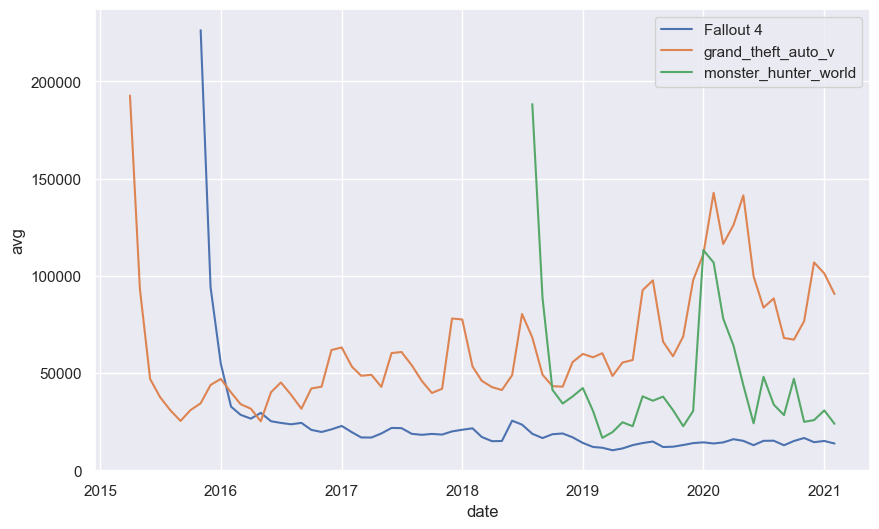

In [234]:
fallout4 = df[df['gamename']=='Fallout 4']
grand_theft_auto_v = df[df['gamename']=='Grand Theft Auto V']
monster_hunter_world = df[df['gamename']=='Monster Hunter: World']

ax = plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="date", y="avg", data=fallout4, label='Fallout 4') 
ax = sns.lineplot(x="date", y="avg", data=grand_theft_auto_v, label='grand_theft_auto_v') 
ax = sns.lineplot(x="date", y="avg", data=monster_hunter_world, label='monster_hunter_world') 

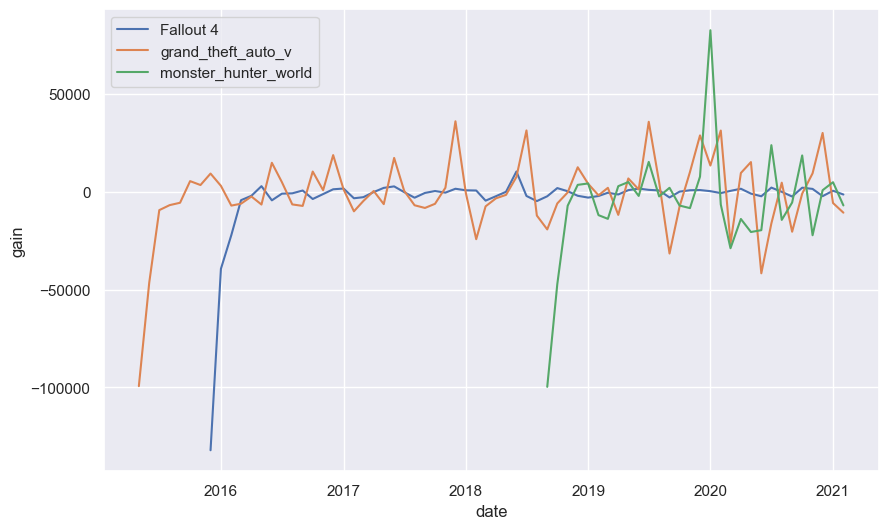

In [227]:
fallout4 = df[df['gamename']=='Fallout 4']
grand_theft_auto_v = df[df['gamename']=='Grand Theft Auto V']
monster_hunter_world = df[df['gamename']=='Monster Hunter: World']

ax = plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="date", y="gain", data=fallout4, label='Fallout 4') 
ax = sns.lineplot(x="date", y="gain", data=grand_theft_auto_v, label='grand_theft_auto_v') 
ax = sns.lineplot(x="date", y="gain", data=monster_hunter_world, label='monster_hunter_world') 

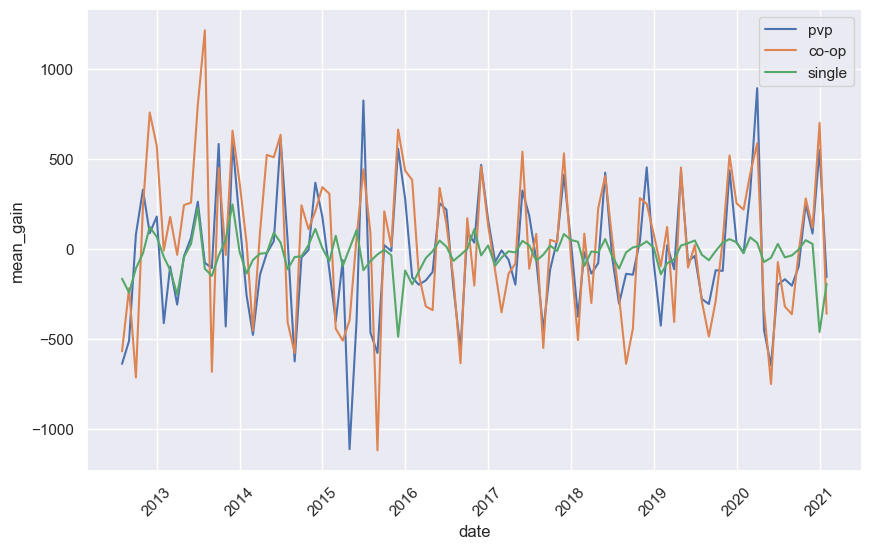

In [215]:
pvp = df[df['pvp']==1]
pvp = pvp.groupby(['date']).agg(mean_gain=('gain', 'mean')) 
co_op = df[df['co-op']==1]
co_op = co_op.groupby(['date']).agg(mean_gain=('gain', 'mean')) 
single = df[df['multi_player']==0]
single = single.groupby(['date']).agg(mean_gain=('gain', 'mean')) 

ax = plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="date", y="mean_gain", data=pvp, label='pvp') 
ax = sns.lineplot(x="date", y="mean_gain", data=co_op, label='co-op') 
ax = sns.lineplot(x="date", y="mean_gain", data=single, label='single') 

plt.xticks(rotation=45)
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

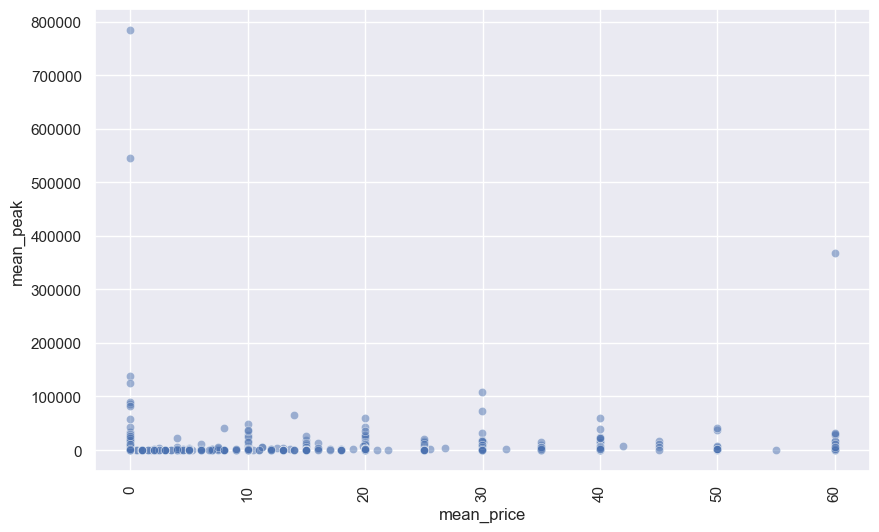

In [211]:
data = df.groupby(['gamename']).agg(mean_peak=("peak", 'mean'), mean_price=('price', 'mean')) 
data = data.reset_index() 

ax = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.scatterplot(x="mean_price", y="mean_peak", data=data, alpha=0.5) 

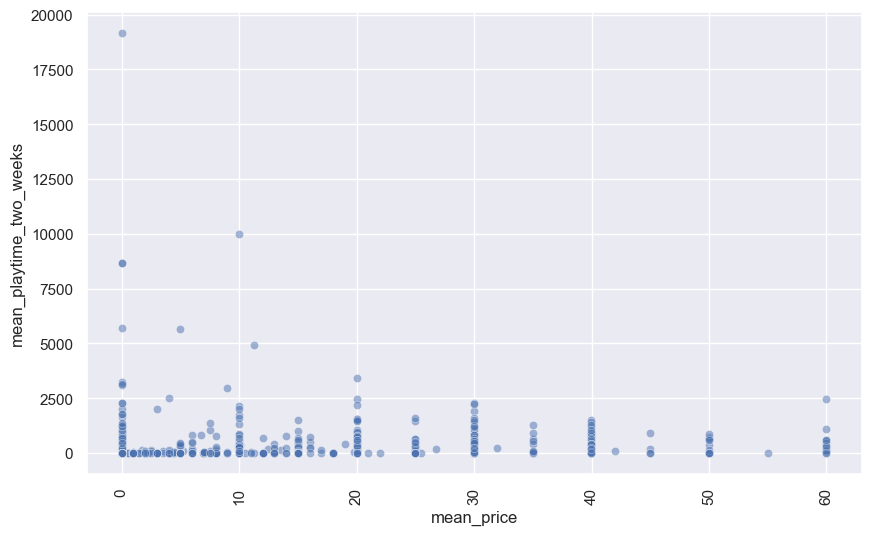

In [210]:
data = df.groupby(['gamename']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean'), mean_price=('price', 'mean')) 
data = data.reset_index() 

ax = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.scatterplot(x="mean_price", y="mean_playtime_two_weeks", data=data, alpha=0.5) 

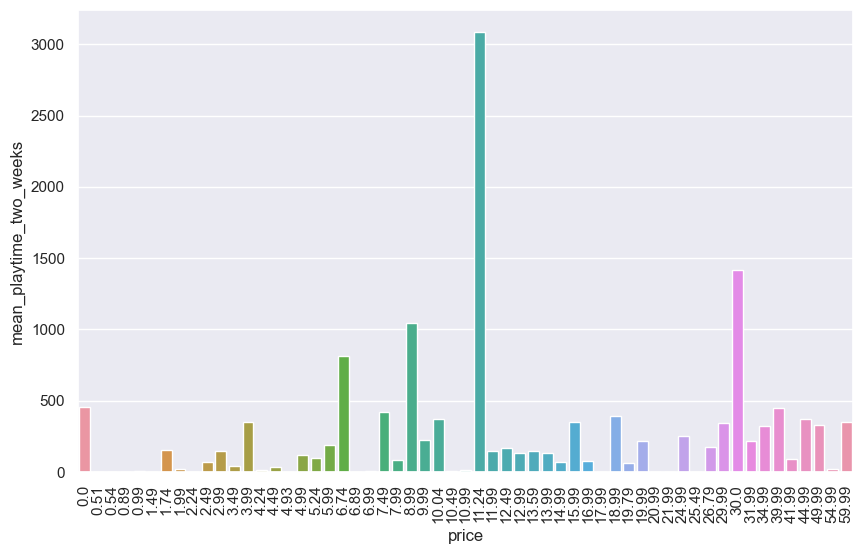

In [200]:
data = df.groupby(['price']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 
data = data.reset_index() 

ax = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.barplot(x="price", y="mean_playtime_two_weeks", data=data) 

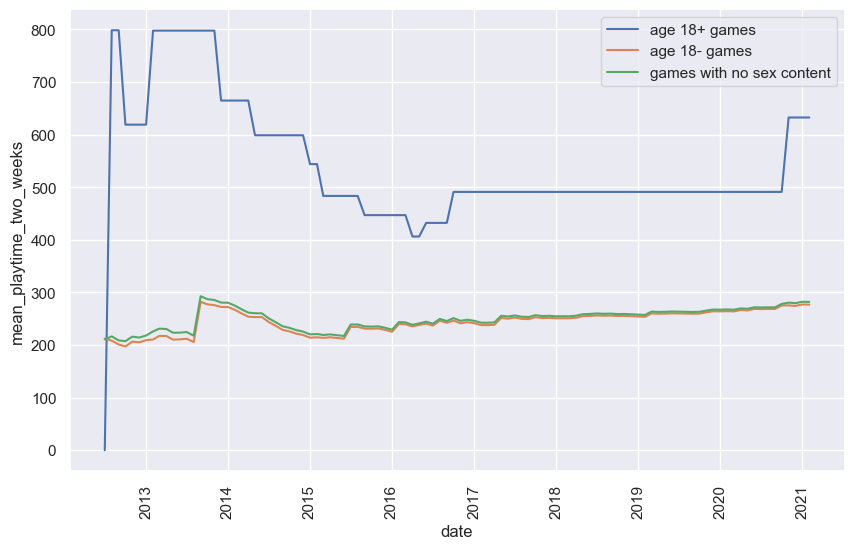

In [198]:
age_18_plus = df[df['age_18_plus']==1]
age_18_plus = age_18_plus.groupby(['date']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 
age_18_below = df[df['age_18_plus']==0]
age_18_below = age_18_below.groupby(['date']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 
no_sex_content = df[df['genre_sexual_content']==0]
no_sex_content = no_sex_content.groupby(['date']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 

# plot barplot 
ax = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.lineplot(x="date", y="mean_playtime_two_weeks", data=age_18_plus, label='age 18+ games') 
ax = sns.lineplot(x="date", y="mean_playtime_two_weeks", data=age_18_below, label='age 18- games') 
ax = sns.lineplot(x="date", y="mean_playtime_two_weeks", data=no_sex_content, label='games with no sex content') 

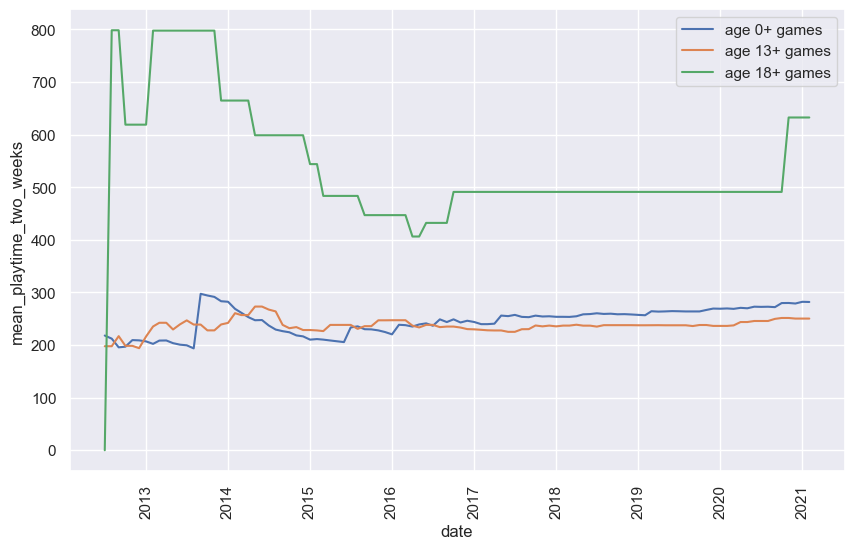

In [194]:
age_0_plus = df[df['age_0_plus']==1]
age_0_plus = age_0_plus.groupby(['date']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 
age_13_plus = df[df['age_13_plus']==1]
age_13_plus = age_13_plus.groupby(['date']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 
age_18_plus = df[df['age_18_plus']==1]
age_18_plus = age_18_plus.groupby(['date']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 

# plot barplot 
ax = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.lineplot(x="date", y="mean_playtime_two_weeks", data=age_0_plus, label='age 0+ games') 
ax = sns.lineplot(x="date", y="mean_playtime_two_weeks", data=age_13_plus, label='age 13+ games') 
ax = sns.lineplot(x="date", y="mean_playtime_two_weeks", data=age_18_plus, label='age 18+ games') 

(13879.0, 19692.0)

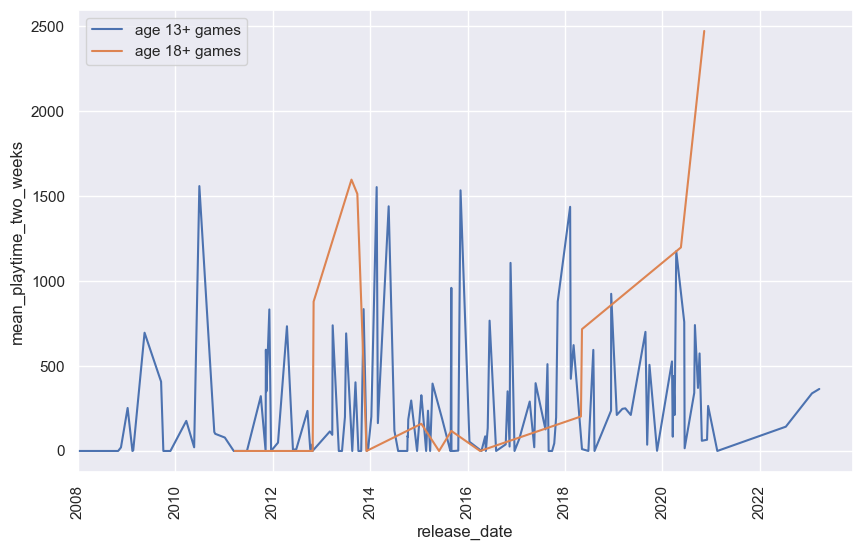

In [184]:
age_13_plus = df[df['age_13_plus']==1]
age_13_plus = age_13_plus.groupby(['release_date']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 
age_18_plus = df[df['age_18_plus']==1]
age_18_plus = age_18_plus.groupby(['release_date']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 

# plot barplot 
ax = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.lineplot(x="release_date", y="mean_playtime_two_weeks", data=age_13_plus, label='age 13+ games') 
ax = sns.lineplot(x="release_date", y="mean_playtime_two_weeks", data=age_18_plus, label='age 18+ games') 
ax.set_xlim([datetime.date(2008, 1, 1), datetime.date(2023, 12, 1)])

(13879.0, 19692.0)

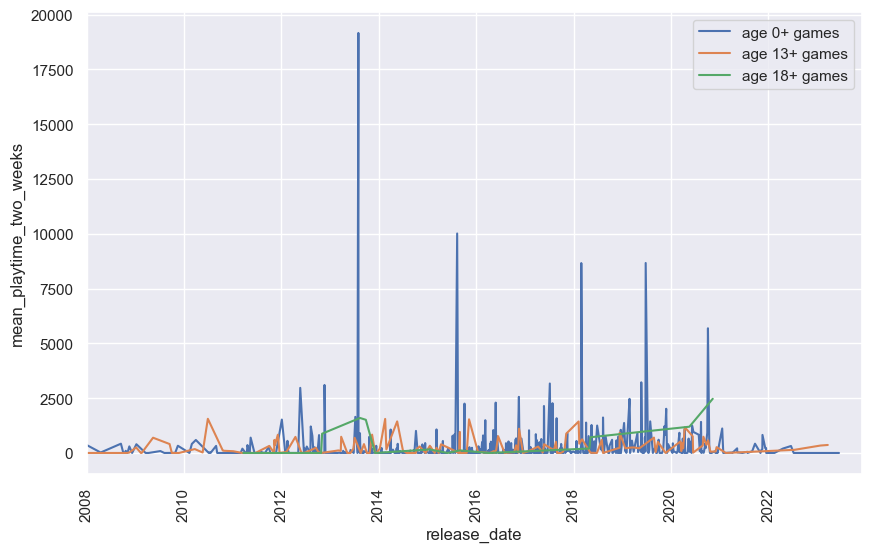

In [183]:
age_0_plus = df[df['age_0_plus']==1]
age_0_plus = age_0_plus.groupby(['release_date']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 
age_13_plus = df[df['age_13_plus']==1]
age_13_plus = age_13_plus.groupby(['release_date']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 
age_18_plus = df[df['age_18_plus']==1]
age_18_plus = age_18_plus.groupby(['release_date']).agg(mean_playtime_two_weeks=("average_playtime_two_weeks", 'mean')) 

# plot barplot 
ax = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.lineplot(x="release_date", y="mean_playtime_two_weeks", data=age_0_plus, label='age 0+ games') 
ax = sns.lineplot(x="release_date", y="mean_playtime_two_weeks", data=age_13_plus, label='age 13+ games') 
ax = sns.lineplot(x="release_date", y="mean_playtime_two_weeks", data=age_18_plus, label='age 18+ games') 
ax.set_xlim([datetime.date(2008, 1, 1), datetime.date(2023, 12, 1)])

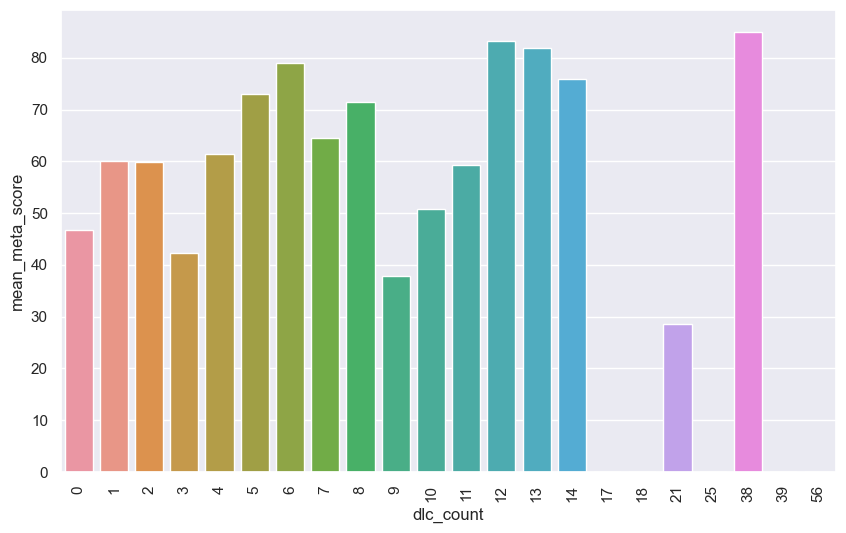

In [157]:
data = df[(df['dlc_count']<150) & (df['multi_player']==0)]
data = data.groupby(['dlc_count']).agg(mean_meta_score=("metacritic_score", 'mean')) 
data = data.reset_index() 

# plot barplot 
ax = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.barplot(x="dlc_count", y="mean_meta_score", data=data) 

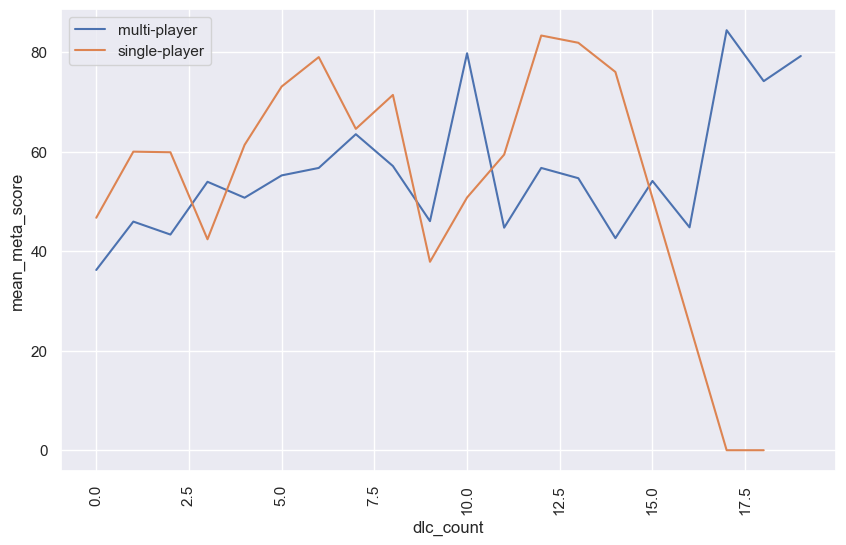

In [158]:
multi = df[(df['multi_player']==1) & (df['dlc_count']<20)]
multi = multi.groupby(['dlc_count']).agg(mean_meta_score=("metacritic_score", 'mean')) 
single = df[(df['multi_player']==0) & (df['dlc_count']<20)]
single = single.groupby(['dlc_count']).agg(mean_meta_score=("metacritic_score", 'mean')) 


# plot barplot 
ax = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.lineplot(x="dlc_count", y="mean_meta_score", data=multi, label='multi-player') 
ax = sns.lineplot(x="dlc_count", y="mean_meta_score", data=single, label='single-player') 

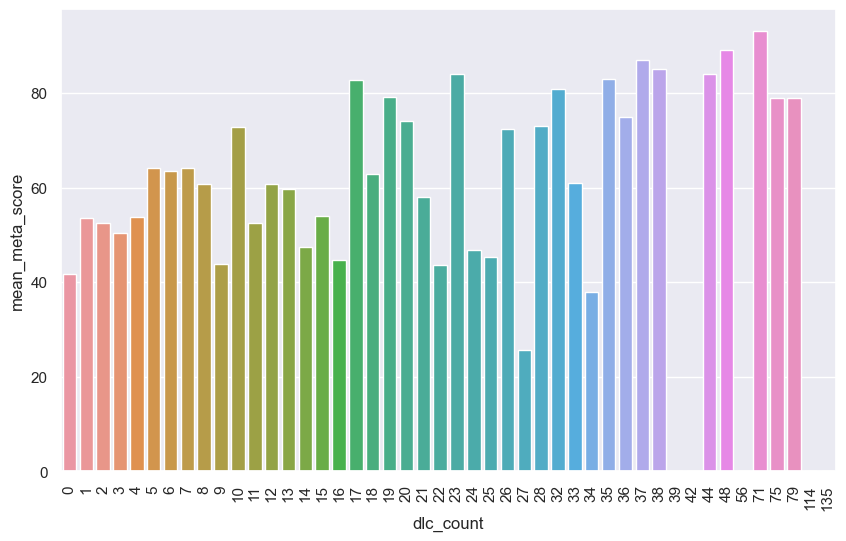

In [133]:
data = df[df['dlc_count']<150]
data = data.groupby(['dlc_count']).agg(mean_meta_score=("metacritic_score", 'mean')) 
data = data.reset_index() 

# plot barplot 
ax = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.barplot(x="dlc_count", y="mean_meta_score", data=data) 

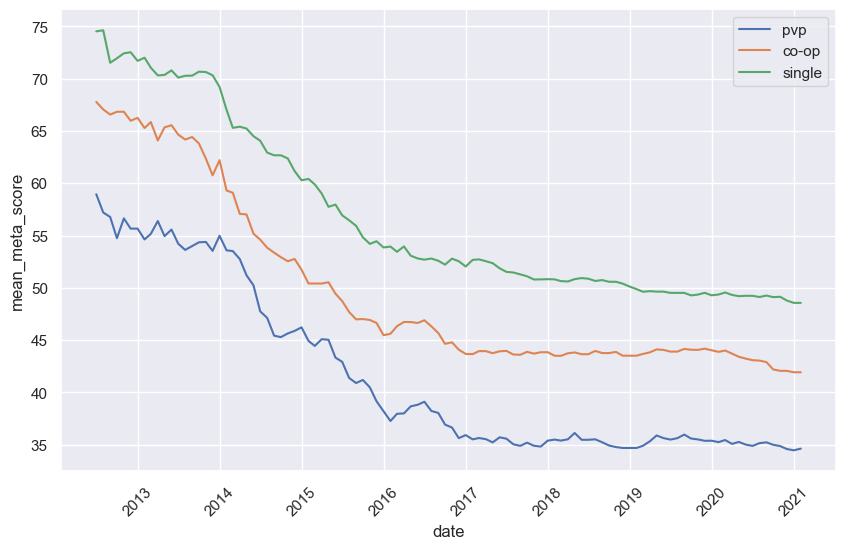

In [159]:
pvp = df[df['pvp']==1]
pvp = pvp.groupby(['date']).agg(mean_meta_score=('metacritic_score', 'mean')) 
co_op = df[df['co-op']==1]
co_op = co_op.groupby(['date']).agg(mean_meta_score=('metacritic_score', 'mean')) 
single = df[df['multi_player']==0]
single = single.groupby(['date']).agg(mean_meta_score=('metacritic_score', 'mean')) 

ax = plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="date", y="mean_meta_score", data=pvp, label='pvp') 
ax = sns.lineplot(x="date", y="mean_meta_score", data=co_op, label='co-op') 
ax = sns.lineplot(x="date", y="mean_meta_score", data=single, label='single') 

plt.xticks(rotation=45)
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

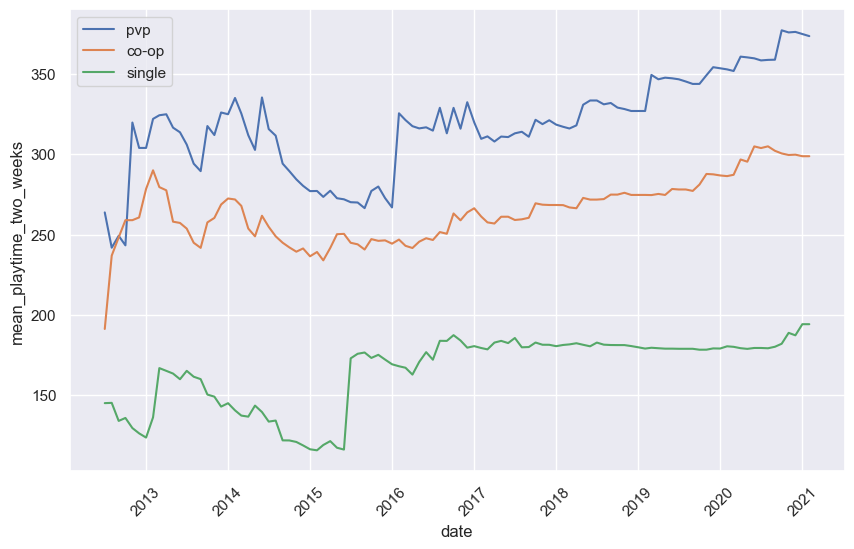

In [131]:
pvp = df[df['pvp']==1]
pvp = pvp.groupby(['date']).agg(mean_playtime_two_weeks=('average_playtime_two_weeks', 'mean')) 
co_op = df[df['co-op']==1]
co_op = co_op.groupby(['date']).agg(mean_playtime_two_weeks=('average_playtime_two_weeks', 'mean')) 
single = df[df['multi_player']==0]
single = single.groupby(['date']).agg(mean_playtime_two_weeks=('average_playtime_two_weeks', 'mean')) 

ax = plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="date", y="mean_playtime_two_weeks", data=pvp, label='pvp') 
ax = sns.lineplot(x="date", y="mean_playtime_two_weeks", data=co_op, label='co-op') 
ax = sns.lineplot(x="date", y="mean_playtime_two_weeks", data=single, label='single') 

plt.xticks(rotation=45)
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

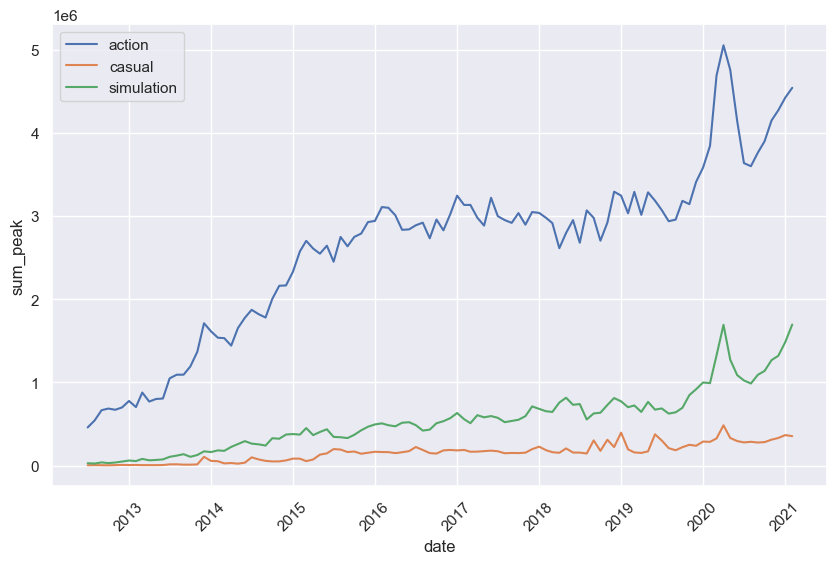

In [125]:
action = df[df['genre_action']==1]
action = action.groupby(['date']).agg(sum_peak=('peak', 'sum')) 
casual = df[df['genre_casual']==1]
casual = casual.groupby(['date']).agg(sum_peak=('peak', 'sum')) 
simulation = df[df['genre_simulation']==1]
simulation = simulation.groupby(['date']).agg(sum_peak=('peak', 'sum')) 

ax = plt.figure(figsize=(10, 6))

ax = sns.lineplot(x="date", y="sum_peak", data=action, label='action') 
ax = sns.lineplot(x="date", y="sum_peak", data=casual, label='casual') 
ax = sns.lineplot(x="date", y="sum_peak", data=simulation, label='simulation') 

plt.xticks(rotation=45)
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

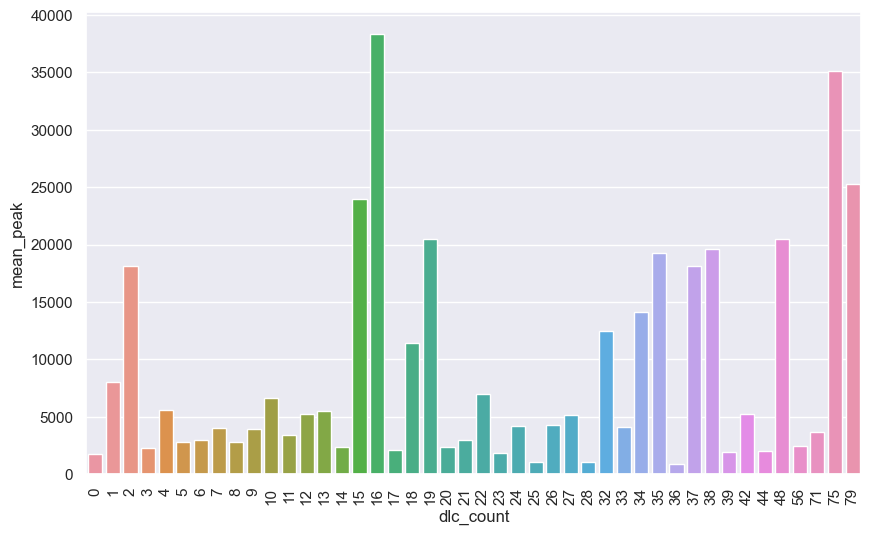

In [126]:
data = df[df['dlc_count']<100]
data = data.groupby(['dlc_count']).agg(mean_peak=("peak", 'mean')) 
data = data.reset_index() 

# plot barplot 
ax = plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
ax = sns.barplot(x="dlc_count", 
           y="mean_peak", 
           data=data) 

Text(0, 0.5, 'Average Players')

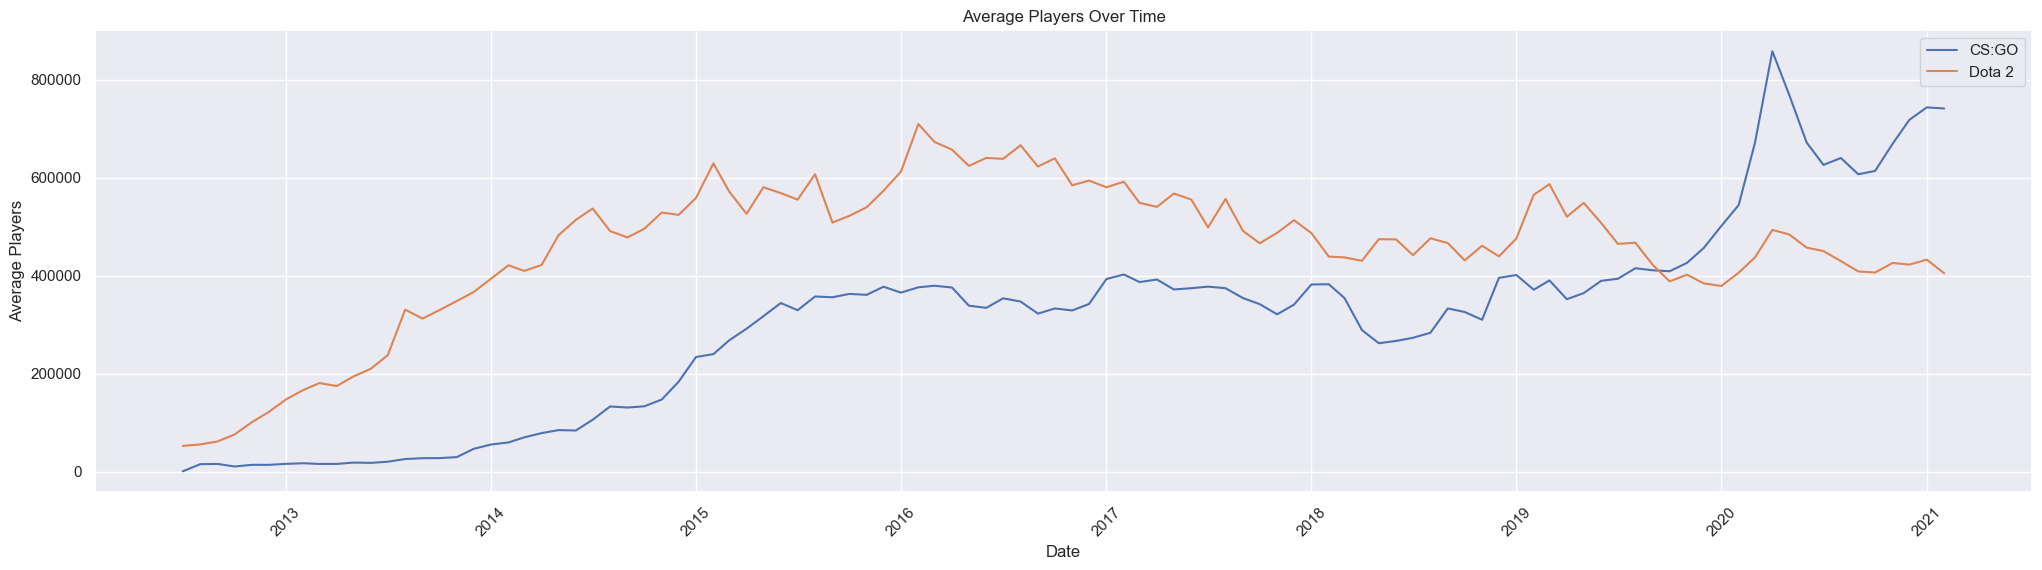

In [127]:
# data
cs_go = df[df['gamename'] == "Counter-Strike: Global Offensive"]
dota2 = df[df['gamename'] == "Dota 2"]

# axes
ax = plt.figure(figsize=(25, 6))
ax = sns.lineplot(data=cs_go, x='date', y='avg', label='CS:GO')
ax = sns.lineplot(data=dota2, x='date', y='avg', label='Dota 2')

# plot
plt.xticks(rotation=45)
plt.title('Average Players Over Time')
plt.xlabel('Date')
plt.ylabel('Average Players')

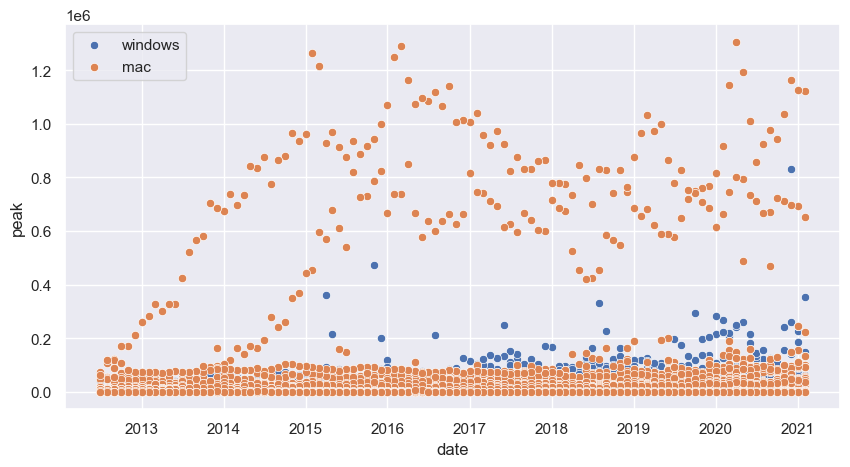

In [128]:
win_games = df[df['windows']==1]
mac_games = df[df['mac']==1]
ax = plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data=win_games, x='date', y='peak', label='windows')
ax = sns.scatterplot(data=mac_games, x='date', y='peak', label='mac')

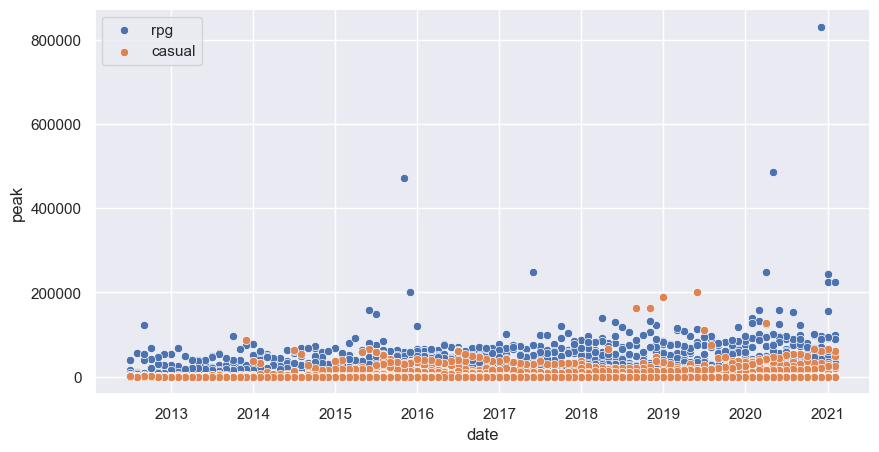

In [129]:
action = df[df['genre_action'] == 1]
rpg = df[df['genre_rpg'] == 1]
casual = df[df['genre_casual'] == 1]

ax = plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data=rpg, x='date', y='peak', label='rpg')
ax = sns.scatterplot(data=casual, x='date', y='peak', label='casual')

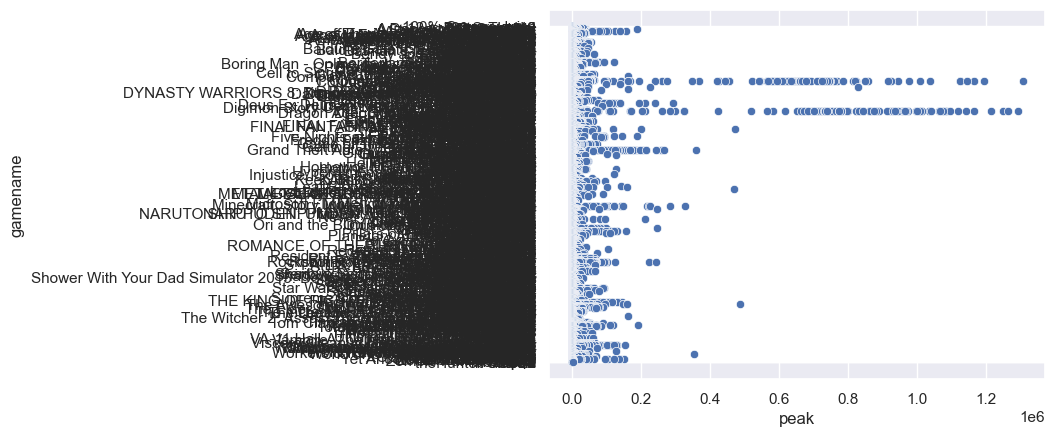

In [130]:
action = df[df['genre_action'] == 1]
ax = sns.scatterplot(df, x='peak', y='gamename')